In [1]:
import numpy as np
import pandas as pd
import pickle

# Load the data
data = pd.read_csv('toy_dataset.csv')  # Replace with your actual filename

# Check the first few rows of the data
print(data.head())

   Number    City Gender  Age   Income Illness
0       1  Dallas   Male   41  40367.0      No
1       2  Dallas   Male   54  45084.0      No
2       3  Dallas   Male   42  52483.0      No
3       4  Dallas   Male   40  40941.0      No
4       5  Dallas   Male   46  50289.0      No


In [2]:
from sklearn.preprocessing import LabelEncoder

# Convert categorical variables to numerical
data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
data['Illness'] = data['Illness'].map({'No': 0, 'Yes': 1})

le = LabelEncoder()
data['City'] = le.fit_transform(data['City'])

print(data.head())

   Number  City  Gender  Age   Income  Illness
0       1     2       0   41  40367.0        0
1       2     2       0   54  45084.0        0
2       3     2       0   42  52483.0        0
3       4     2       0   40  40941.0        0
4       5     2       0   46  50289.0        0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Summary statistics
print(data.describe())

              Number           City         Gender            Age  \
count  150000.000000  150000.000000  150000.000000  150000.000000   
mean    75000.500000       3.591807       0.441333      44.950200   
std     43301.414527       1.826295       0.496548      11.572486   
min         1.000000       0.000000       0.000000      25.000000   
25%     37500.750000       2.000000       0.000000      35.000000   
50%     75000.500000       4.000000       0.000000      45.000000   
75%    112500.250000       5.000000       1.000000      55.000000   
max    150000.000000       7.000000       1.000000      65.000000   

              Income        Illness  
count  150000.000000  150000.000000  
mean    91252.798273       0.080927  
std     24989.500948       0.272723  
min      -654.000000       0.000000  
25%     80867.750000       0.000000  
50%     93655.000000       0.000000  
75%    104519.000000       0.000000  
max    177157.000000       1.000000  


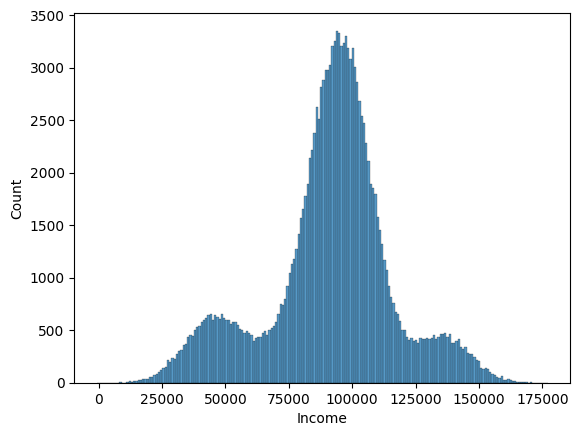

In [4]:
# Distribution of income
sns.histplot(data['Income'])
plt.show()

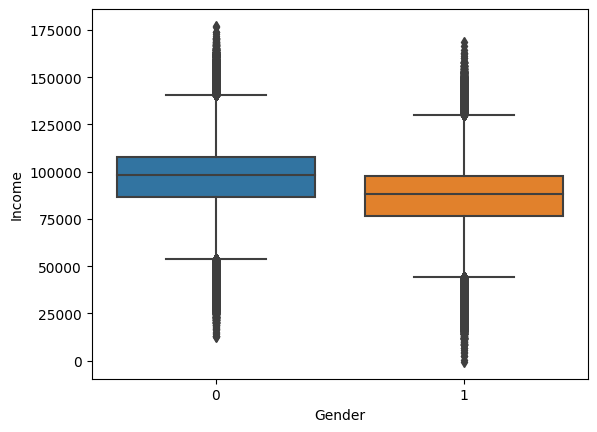

In [5]:
# Boxplot of income by gender
sns.boxplot(x='Gender', y='Income', data=data)
plt.show()

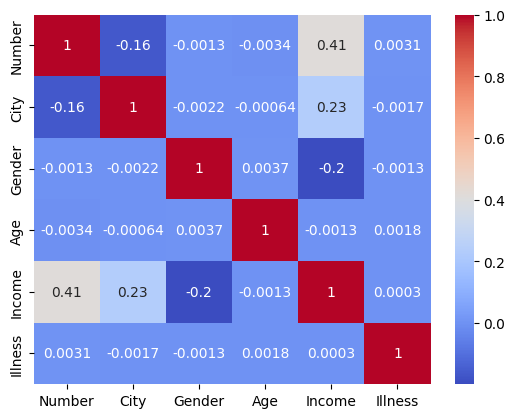

In [6]:
# Correlation matrix
corr = data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Split the data into features (X) and target (y)
X = data[['City','Gender','Illness']]
y = data['Income']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 10],
    'min_samples_leaf': [1, 4]
}

# Create a base model
rf = RandomForestRegressor()

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, 
                          cv=3, n_jobs=-1, verbose=2, scoring='r2')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

# Train the model using the best parameters
best_rf_model = RandomForestRegressor(n_estimators=best_params["n_estimators"],
                                      max_depth=best_params["max_depth"],
                                      min_samples_split=best_params["min_samples_split"],
                                      min_samples_leaf=best_params["min_samples_leaf"])

best_rf_model.fit(X_train, y_train)

# Predicting the Test set results
y_pred = best_rf_model.predict(X_test)

# Compute R2 score
r2_score = best_rf_model.score(X_test, y_test)
print(f"R2 Score: {r2_score}")


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best parameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
R2 Score: 0.8366572234810479


In [8]:
# Saving model to disk
pickle.dump(best_rf_model, open('model.pkl','wb'))

[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.9s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.8s
[CV] END max_depth=None, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   3.3s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.6s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=50; total time=   0.7s
[CV] END max_depth=10, min_samples_leaf=4, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   2.6s
[CV] END max_depth=20, min_samples_leaf=4, min_samples_split=10, n_estimators=50; tota